# clustring experiment submitted by Mohammed Azaz Ahmad

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

This notebook is slightly adapted from Aurélien Géron's book.

*First*, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [279]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## K-Means

Let's start by generating some blobs with various means and standard deviations :




In [280]:
from sklearn.datasets import make_blobs

In [281]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [282]:
X, y  = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Saving figure blobs_plot


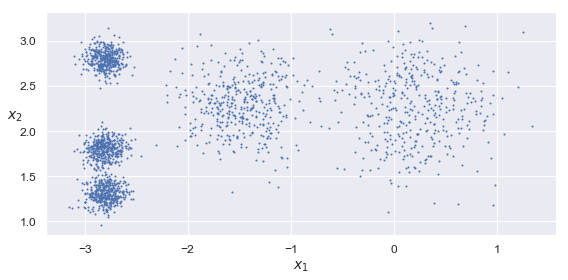

In [283]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

**TODO : Try a few combination of means and standard deviations to check you understand how to make various data sets with more or less overlapping clusters. Add notebook cells below to show a variety of results.**

# Dataset 1

We have created 3 datasets with various means and standard deviation, in this section, we want to learn how we can create dataset with Scikit-Learn library.cikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity. make-blobs function create multiclass datasets by allocating each class one or more normally-distributed clusters of points. make_blobs provides greater control regarding the centers and standard deviations of each cluster create dataset which we have used in our experiments. we have created three types of dataset with simple and more challenges overlapping situation.

Saving figure blobs_plot


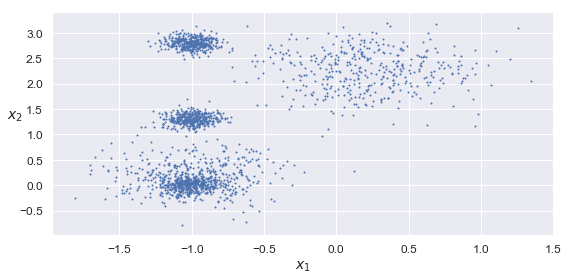

In [284]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1 ,  0.2],
     [-1,  0],
     [-1,  2.8],
     [-1,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X1, y1 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def plot_clusters(X1, y1=None):
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X1)
save_fig("blobs_plot")
plt.show()

This is our first dataset, as we can see the above graph, it is quite simple, there are four groups and they have fewer overlapping clusters. but it is pretty good for K-means algorithm.

# Dataset 2

Saving figure blobs_plot


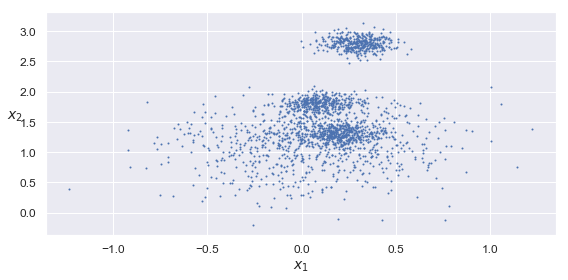

In [285]:
blob_centers = np.array(
    [[ 0,  1],
     [0.1 ,  1.3],
     [0.1,  1.8],
     [0.3,  2.8],
     [0.2,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def plot_clusters(X2, y2=None):
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X2)
save_fig("blobs_plot")
plt.show()

This is our second dataset with overlapping cluster, there are two groups of data point but in second group they have lots of data points and more overlapping. It will be Quite difficult to perform K-means on this dataset. it is quite challenges dataset for K-means.

# Dataset 3

Saving figure blobs_plot


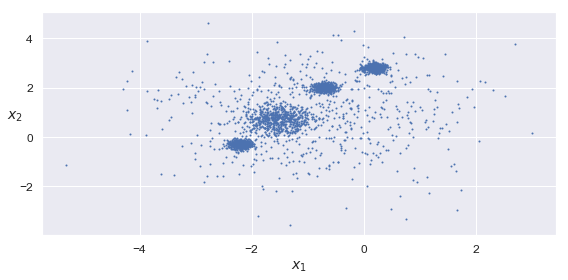

In [296]:
blob_centers = np.array(
    [[ -1,  1],
     [-1.5 ,  0.7],
     [-2.2,  -0.3],
     [0.2,  2.8],
     [-0.7,  2]])
blob_std = np.array([1.4, 0.3, 0.1, 0.1, 0.1])


X3, y3 = make_blobs(n_samples=3000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def plot_clusters(X3, y3=None):
    plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X3)
save_fig("blobs_plot")
plt.show()

This is our Third dataset with more clusters and more overlapping situations, as we can see in the graph there are four clusters in diagonal shape. The main motive of this dataset is making hard for K-means which we will perform in below section. there are many points are far from all clusters which is difficult to assign the centroids. it will be very hard to perform K-means on this dataset.

### Fit and Predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob. For the time being, let's assume we know and hard-code how many clusters there are in the data sets.

In [297]:
from sklearn.cluster import KMeans

In [298]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the 5 clusters:

In [299]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [300]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [301]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [302]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

Of course, we can predict the labels of new instances:

In [303]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [304]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


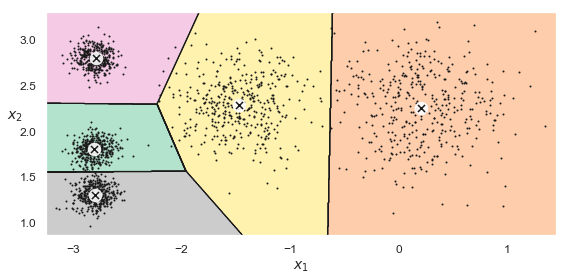

In [305]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

**TODO : try run kmeans over a few data sets that you have generated as above. Show 3 cases where it gives good results or not so good results**

# Case 1

Saving figure voronoi_plot


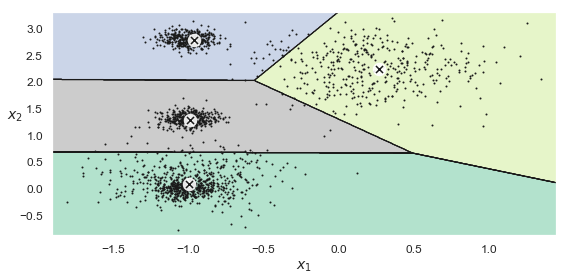

In [306]:
# Apply KMeans
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X1)

# Plot graph
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X1)
save_fig("voronoi_plot")
plt.show()

In this part we want to check how k-means performe at various dataset wtih less and more overlapp clustrts and what types of output it will give. We have applied Kmeans on dataset1 which we have designed above section, we have run k-means and assigned  4 clusters, i.e, K=4. As we can see in graph four clusters are seprated but some of the instances near the edges were probably assigned to the wrong cluster, but it's not bad and it looks pretty good.

# Case 2

Saving figure voronoi_plot


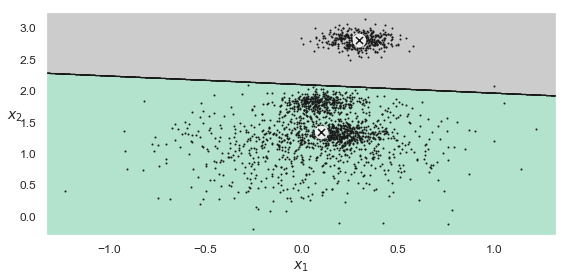

In [307]:
# Apply KMeans
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X2)

# Ploitng graph
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X2)
save_fig("voronoi_plot")
plt.show()

In case2, we have applied k-means on dataset2 which we have designed in the above section. We have run k-means and assigned 2 clusters, i.e, K=2. We can look graph, both clusters are seperated well, it is better than previous one. When we have changed values of K, but it does not make separate clusters. So, cluster 2 is good, well separated and looks pretty good.

# Case 3

Saving figure voronoi_plot


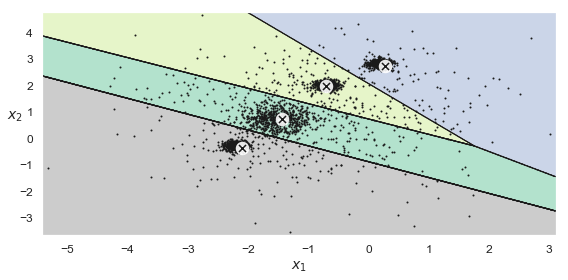

In [308]:
# Apply KMeans
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X3)

# Ploting throungh calling function
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X3)
save_fig("voronoi_plot")
plt.show()


In case3, our dataset is more challenges and more overlap clusters. We have run K-means on dataset3 and assigned K=4, we can see in plot, the clusters are separated badly, many data points assigned to wrong clusters. K-means is failed on this dataset. It’s hard to find clusters on overlap dataset.

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [309]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

And let's plot this:

Saving figure kmeans_algorithm_plot


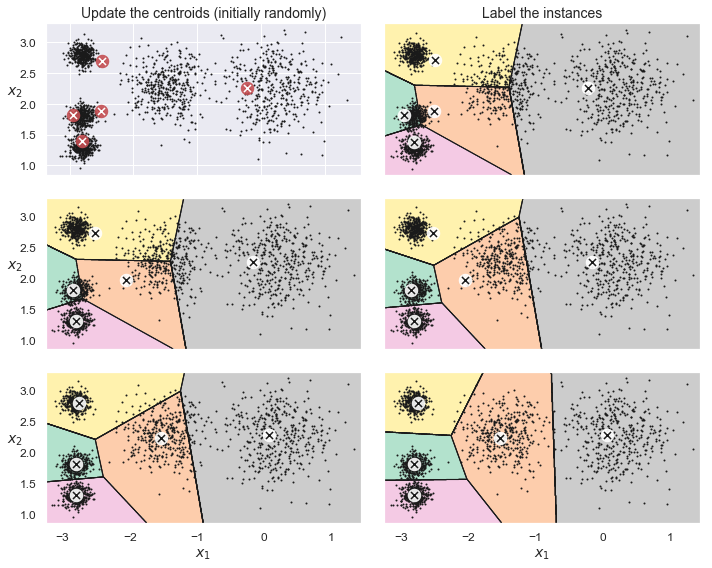

In [310]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

**TODO : run this experiment for a data set you designed and check how well the result compares after 2 and after many iterations.**

Saving figure kmeans_algorithm_plot


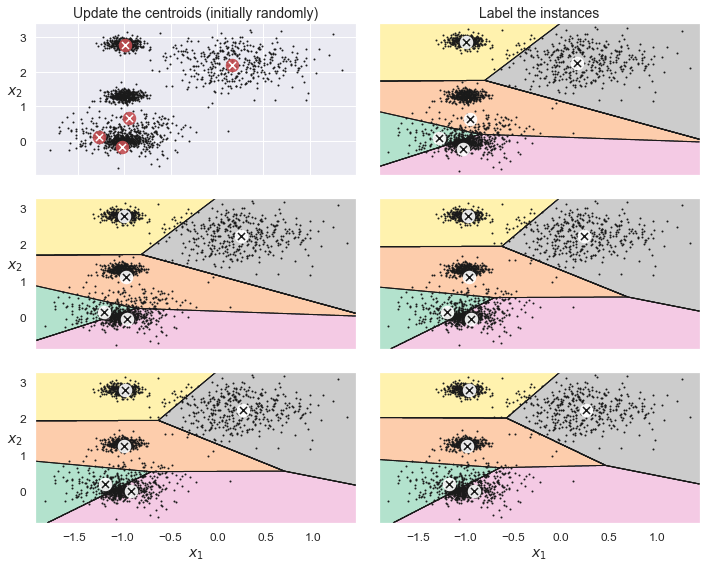

In [311]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X1)
kmeans_iter2.fit(X1)
kmeans_iter3.fit(X1)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X1)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X1, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X1, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X1, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X1, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X1, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

In this section we want to check how the centroids move around dataset in K-means.we'll show that different initializations of centroids may yield to different results. I'll use 9 different random_state to change the initialization of the centroids and plot the results. We have appiled K-means on dataset1 for 3 iteration, When we have compared result after 2 iteration we can see in plot, In first iteration centroids are not assigned with good clusters, after updated centroids the centroids are moving near to clusters but it is also not perfect, the centroids again updated then we can see that centroids move with good clusters. As the graph above shows that we only ended up with five different ways of clusterings based on different initializations. We would pick the one with the lowest sum of squared distance.

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [312]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


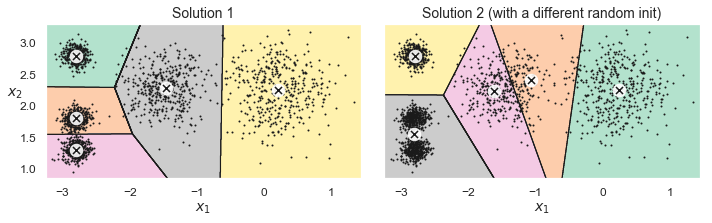

In [313]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=13)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

**TODO : make the above experiments for various data sets you design, in order to feel what types of data sets configuration seem to lead to more unstable results depending on initialization. It can be useful to compute and display more that two random concurrent runs. Use the section below (clustering quality evaluation) to include a clustering score comparison) in your results.**

Saving figure kmeans_variability_plot


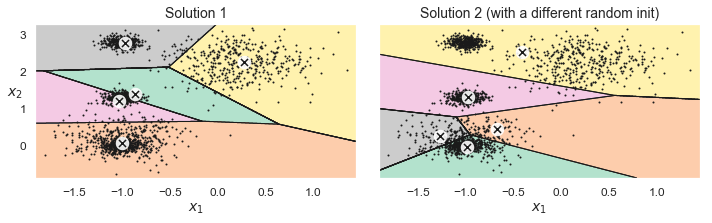

In [321]:
kmeans_rnd_init4 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=15)
kmeans_rnd_init5 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=25)

plot_clusterer_comparison(kmeans_rnd_init4, kmeans_rnd_init5, X1, 
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

In [322]:
kmeans.score(X1)

-1185.8913917279679

Saving figure kmeans_variability_plot


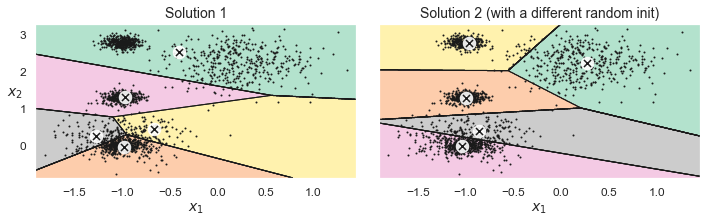

In [323]:
        
kmeans_rnd_init6 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=13)
kmeans_rnd_init7 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init6, kmeans_rnd_init7, X1,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

In [324]:
kmeans.score(X1)

-1185.8913917279679

When the k-means clustering algorithm runs, it uses a randomly generated seed to determine the starting centroids of the clusters.If the feature variables exhibit patterns that automatically group them into visible clusters, then the starting seed will not have an impact on the final cluster memberships. However, if the data is evenly distributed, then we might end up with different cluster members based on the initial random variable.

we have performed on dataset1 in two cases and we have compared the score of both cases.As we an see from the above plot, the data points are distributed almost evenly all over the scatter plot.position would affect the final cluster shapes and memberships.Each time the clustering algorithm runs, it is going to pick a random seed and that seem to impact the shapes and memberships of the clusters.In both cases we got unstabe result, it give different groupings of the data. Setting the seed explicitly to a specific value is required to generate the same results every time.



### Clustering quality evaluation with inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

> Bloc en retrait



In [325]:
kmeans.inertia_

1432.4384693121945

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [326]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2000,) (3000,) 

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [327]:
kmeans.score(X)

-4639.58274129572

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [328]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)
kmeans_rnd_10_inits.score(X)

-211.59853725816856

**TO DO : expand the previous experiment to check if running many different random initializations improves the stability and quality of the result**

In [329]:
kmeans_rnd_11_inits = KMeans(n_clusters=5, init="random", n_init=50,
                              algorithm="full", random_state=7)
kmeans_rnd_11_inits.fit(X)
kmeans_rnd_11_inits.score(X)


-211.59853725816856

The fact of n_init parameter, Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Here we have changed hyperparameter n_init and random state we got the same score as previous one, it does not chenge quality of the result.

### K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

In [330]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**TODO : try to modify the step-by-step k-means previous experiment to check if kmeans++ improves what is expected (initialization, convergence speed and final results). You might need to experiment on a dataset where basic kmeans does not perform so well**

Saving figure voronoi_plot


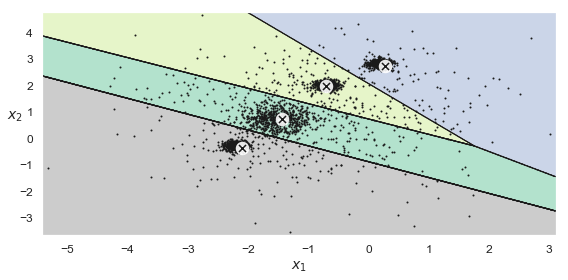

In [331]:
# Apply KMeans
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X3)

# Ploting throungh calling function
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X3)
save_fig("voronoi_plot")
plt.show()


In [332]:
kmeans_rnd_10_inits.score(X3)

-5572.22032789657

Saving figure voronoi_plot


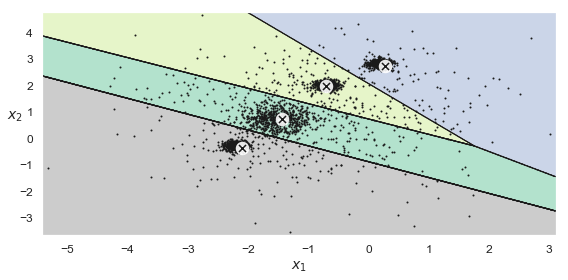

In [333]:
# Apply Kmeans++
kmeans_rnd_30_inits = KMeans(n_clusters=4, init="k-means++", n_init=20,
                              algorithm="full", random_state=42)
kmeans_rnd_30_inits.fit(X3)
kmeans_rnd_30_inits.score(X3)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X3)
save_fig("voronoi_plot")
plt.show()

In [334]:
kmeans_rnd_30_inits.score(X3)

-1432.4573986245305

We have applied K-means and k-means++ on dataset3, which we have desiged above. here we want to check the result of K-means++, it improve the result or not. k-means++ algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.

Although the initialization in K-means++ is computationally more expensive than the standard K-means algorithm, the run-time for convergence to optimum is drastically reduced for K-means++. This is because the centroids that are initially chosen are likely to lie in different clusters already. As we an see both plots, it looks like same but score is different. We can say that K-means++ improve the result as compared to K-means.

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


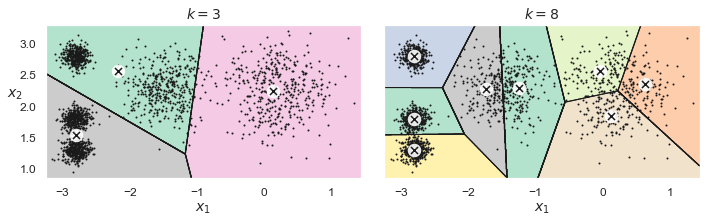

In [335]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

**TODO : Show experimentally that inertia is not a good criterion for assessing the number of clusters and explain.**

Saving figure inertia_vs_k_plot


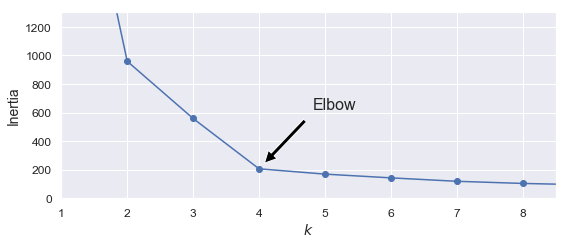

In [336]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Inertia is use to identify the sum of squared distances of samples to the nearest cluster centre. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. We can see in plot the elbow define number of clusters that is K=4, and if K values will be less it means it would be bad. but in our case it looks pretty good.
Inertia is not a good criterion for assessing the number of clusters because they have some drawbacks

1.Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to       elongated clusters, or manifolds with irregular shapes.

2.Inertia is not a normalized metric, we just know that lower values are better and zero is optimal. But in very high-     dimensional spaces, Euclidean distances tend to become inflated, this is an instance of the so-called “curse of       dimensionality”.



Let's plot the inertia as a function of $k$ and analyze the resulting curve:

In [337]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


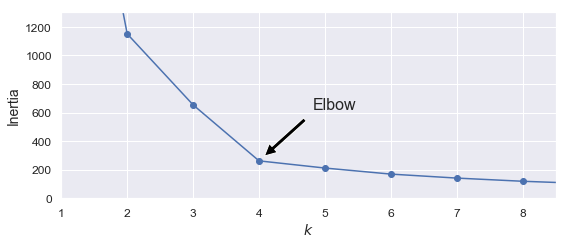

In [338]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

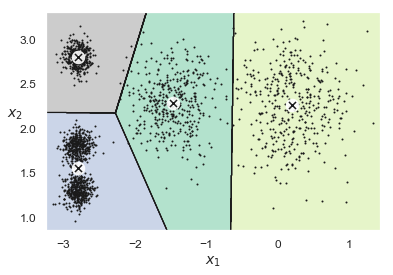

In [339]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Geometric assumptions and limits of K-Means

**TODO : by designing appropriate data sets with spherical blobs, show that k-means can perfom badly due to the inequal variances of clusters**

Saving figure blobs_plot


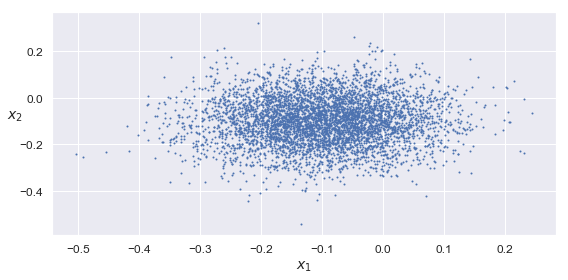

In [341]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ -0.1,  -0.1]])
blob_std = np.array([0.1])

X7, y  = make_blobs(n_samples=5000, centers=blob_centers,
                  cluster_std=blob_std, random_state=40)

def plot_clusters(X7, y=None):
    plt.scatter(X7[:, 0], X7[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X7)
save_fig("blobs_plot")
plt.show()

Saving figure voronoi_plot


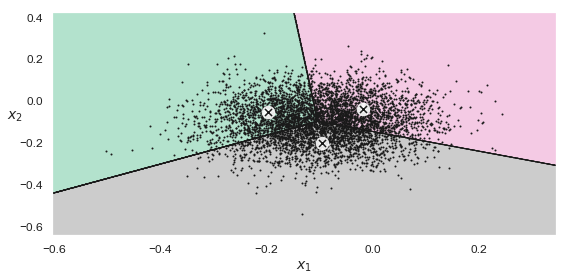

In [342]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X7)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X7)
save_fig("voronoi_plot")
plt.show()

We have designed spherical dataset and we applied Kmeans on this dataset where we select K=3, we can see in the plot, Kmean is not able to find good clusters, it’s given badly result. Kmeans algorithm is good in capturing structure of the data if clusters have a nice spherical shape but if the minute the clusters have a complicated geometric shape, Kmeans does a bad result in clustering the data.

Kmeans clustering to work well, the following assumptions have to hold true
1. The variance of the distribution of each attribute (variable) is spherical
2. All variables have the same variance
3. The prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations

If any one of these 3 assumptions is violated, then k-means does not do a good job

**TODO : Let's now make data sets blobs that are not spherical. To do this, me multiply the data with a matrix to operate a data transformation. Try various matrices to generate an expansion along one axis, then an expansion followed by a (eg 45°) rotation. Demonstrate on several complementary cases how k-means fails because of its geometric assumptions.**

---



---



We have performed Kmeans on three non-spherical dataset and we have compared three cases, how k-means fails because of its geometric assumptions. Kmeans performed well if clusters have nice spherical shape and the clusters are not overlap. First, kmeans algorithm doesn’t let data points that are far-away from each other share the same cluster even though they obviously belong to the same cluster.

# Case 1

Saving figure kmeans_plot


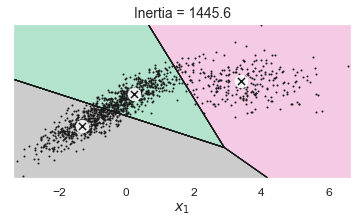

In [343]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((-1, -1), (0, 0)), random_state=42)

X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]])) # This transforms the data

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_non_spherical = KMeans( n_clusters=3, random_state=42)
kmeans_non_spherical.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(122)
plot_decision_boundaries(kmeans_non_spherical, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_non_spherical.inertia_), fontsize=14)

save_fig("kmeans_plot")
plt.show()

# Case 2

Saving figure blobs_plot


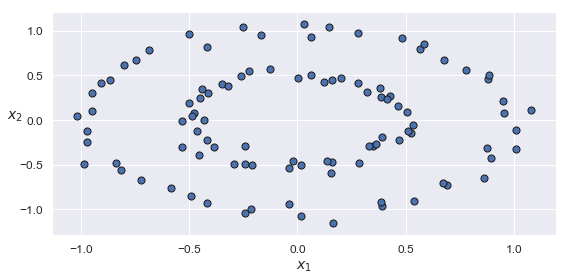

Saving figure kmeans_plot


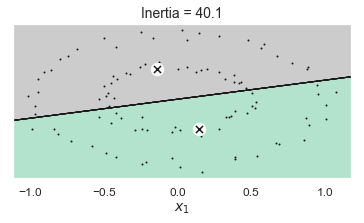

In [344]:
# Generate non spherical dataset
from sklearn.datasets import make_circles
X9, y = make_circles(factor=0.5, random_state=0, noise=0.05)
def plot_clusters(X9, y=None):
    plt.scatter(X9[:, 0], X9[:, 1], c=y, s=50, edgecolor='k')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X9)
save_fig("blobs_plot")
plt.show()

# Apply Kmeans
kmeans_non_spherical = KMeans(n_clusters=2, random_state=42)
kmeans_non_spherical.fit(X9)

plt.figure(figsize=(10, 3.2))

plt.subplot(122)
plot_decision_boundaries(kmeans_non_spherical, X9, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_non_spherical.inertia_), fontsize=14)

save_fig("kmeans_plot")
plt.show()

In case2, our dataset looking like non spherical. As a human we can immediately recognize that there are two groups of points and it is well separated, there is no mistakes. When we have applied K-means algorithm where we have selected number of clusters K=2, So we can the plot, the clusters are not separated, and K-means performed badly, here K-means is failed to find clusters. We have tried serval number of clusters but still K-means is not able to find clusters.

Here, K-means is trying to fit a square peg in a round hole- trying to find nice centres with neat spheres around them- and it failed. It’s still minimizing the within-cluster sum of squares.


# Case 3

Saving figure kmeans_plot


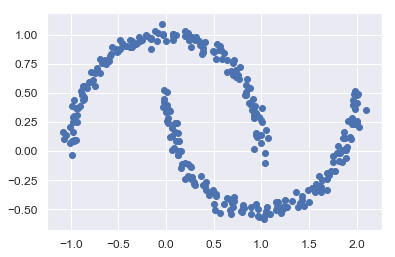

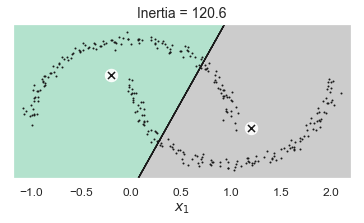

In [345]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(300, noise=.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

# Apply Kmeans
kmeans_non_spherical = KMeans(n_clusters=2, random_state=42)
kmeans_non_spherical.fit(Xmoon)

plt.figure(figsize=(10, 3.2))

plt.subplot(122)
plot_decision_boundaries(kmeans_non_spherical, Xmoon, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_non_spherical.inertia_), fontsize=14)

save_fig("kmeans_plot")
plt.show()

In case3, we have created moon dataset from scikit-learn function, it is also looking like non spherical shape. We have applied K-means algorithm where we have selected K=2. As we can see in plot, the clusters are not separated because of geometric assumptions, both centroids are assigned wrong dataset points. So, in our all cases, the K-means algorithm is failed for find clusters.

K-means algorithm is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of k-means is to group data points into distinct non-overlapping subgroups. It gives a good result when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes. Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined. In this experiment we covered both strength, weaknesses, and some evaluation methods related to k-means.


In [346]:
from sklearn.datasets import make_blobs

In [347]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)

X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]])) # This transforms the data

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [348]:
kmeans_non_spherical = KMeans(n_clusters=3, random_state=42)
kmeans_non_spherical.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Saving figure kmeans_plot


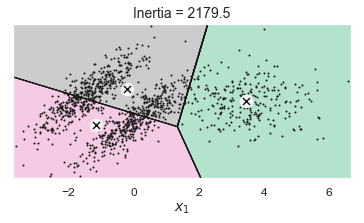

In [349]:
plt.figure(figsize=(10, 3.2))

plt.subplot(122)
plot_decision_boundaries(kmeans_non_spherical, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_non_spherical.inertia_), fontsize=14)

save_fig("kmeans_plot")
plt.show()

# Gaussian Mixtures

In [394]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [395]:
from sklearn.mixture import GaussianMixture

In [396]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Let's look at the parameters that the EM algorithm estimated:

In [397]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [398]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [399]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

Did the algorithm actually converge?

In [400]:
gm.converged_

True

Yes, good. How many iterations did it take?

In [401]:
gm.n_iter_

4

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [402]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [403]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [404]:
X_new, y_new = gm.sample(6)
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [405]:
y_new

array([0, 1, 2, 2, 2, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:

In [406]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [407]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


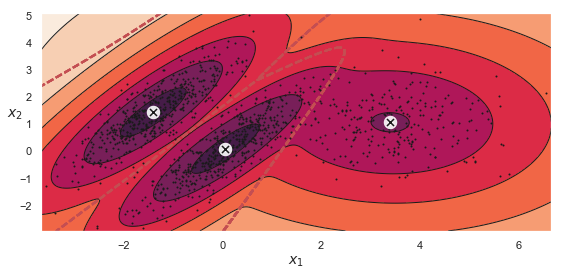

In [408]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [365]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [366]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


Saving figure covariance_type_plot


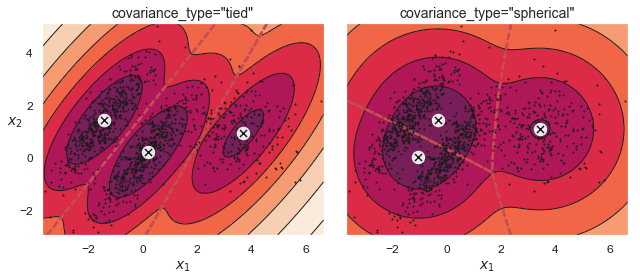

In [367]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

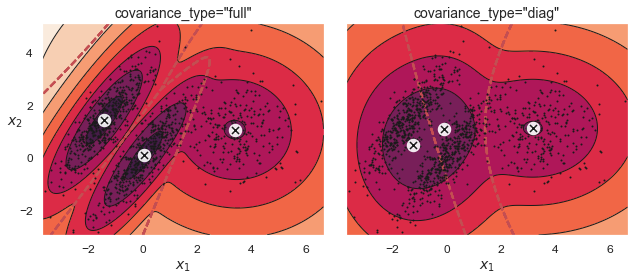

In [368]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

**TODO : make data sets with more challenging situations (more clusters in the data sets, more overlap between clusters) to see how Gaussian mixtures behave**

Saving figure gaussian_mixtures_plot


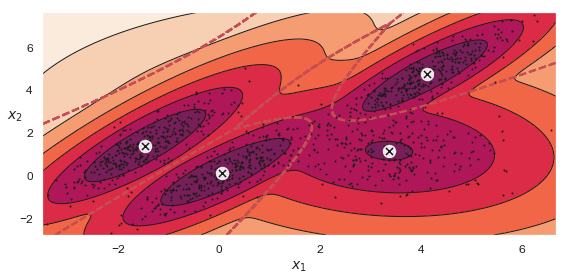

In [369]:
X11, y11 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0),(2, 4.4)), random_state=42)
X11 = X11.dot(np.array([[0.37, 0.95], [0.732, 0.598]]))
X22, y22 = make_blobs(n_samples=250, centers=1, random_state=42)
X22 = X22 + [6, -8]
x = np.r_[X11, X22]
y = np.r_[y11, y22]

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
gm.fit(x)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, x)
save_fig("gaussian_mixtures_plot")
plt.show()

In this experiment, we have performed Gaussian mixture model. firstly, we see that why we need gaussian mixture, gaussian mixture works as a k-means but in many situation k-means failed because of some overlapping data or geometric assumption shapes. Gaussian Mixture Models a probabilistic approach to clustering addressing many of these problems. In this approach we describe each cluster by its centroid (mean), covariance, and the size of the cluster (Weight). Here rather than identifying clusters by nearest centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point, we can calculate the probabilities of it belonging to each of the clusters.

We have created more challenging situations dataset where there are more clusters and more overlap between clusters. After we have applied Gaussian Mixture Models and we have select n_components= 4, After getting component distribution in above graph depending upon variance and mean of particular cluster we get probability of any data point x belongs to every cluster.

## Model selection

We cannot use the inertia it assumes that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [370]:
gm.bic(X)

8976.631143476958

In [371]:
gm.aic(X)

8858.620470380141

We could compute the BIC manually like this:

In [372]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [373]:
bic, aic

(8933.845750495178, 8846.620470380141)

In [374]:
n_params

17

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [375]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [376]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_plot


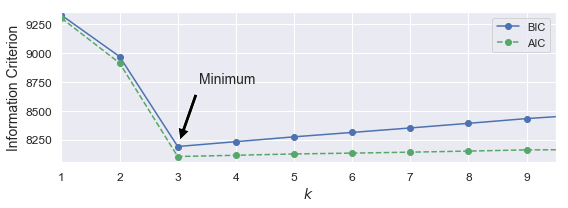

In [377]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [378]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [379]:
best_k

3

In [380]:
best_covariance_type

'full'

**TO DO : Design your own experiment to show the performance of the BIC criterion for estimating the correct number of Gaussians in the mixture**

Saving figure aic_bic_vs_k_plot


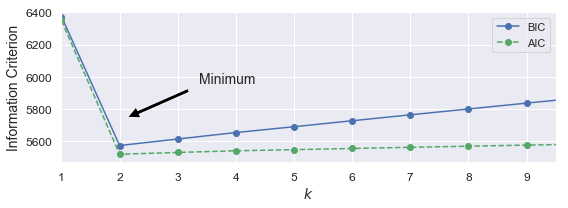

In [381]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X1)
             for k in range(1, 11)]

bics = [model.bic(X1) for model in gms_per_k]
aics = [model.aic(X1) for model in gms_per_k]


plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(2, bics[5]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

We have used Dataset1 for know the performance of correct number of Gaussians in the mixture with BIC criterion.The dataset designed on above top section. How we can measure the performance of Gaussians mixture components, well there are several method for measure the performance of Gaussians mixture components but in our example we have used BIC and AIC for measure the performance of Gaussians mixture components. basically, we used this method for know the number of clusters. As the promise, the lower value of BIC the better is the model to actually predict the data, in our case we have select the "K" numbers of components and we can see in plot, the minimum is 2 so it's quite good result for our experiment, in graph, we can see that after 2 the line is going in maximum direction so as we considered number of clusters is 2.

BIC is the standard method of model selection for GMM, however it assumes that the true generating model is among the tested models. BIC and AIC is the simplest way to do model comparison would be by carrying out likelihood comparison between the competing models and choosing the model with the highest likelihood as the best model. However, the maximization of likelihood could lead to an overfitting of the model to the data with additional degrees of freedom and hence we need a more robust and accurate criterion, which will penalize the use of extra free parameters.This can be done by using the Information criterion tests, such as Akaike Information Criteria (AIC) and the Bayesian Information Criteria (BIC).

**TO DO : generate a data set with the "make_moons" scikit-learn function and demonstrate how a Gaussian mixture can be fit to this data set**

In [382]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

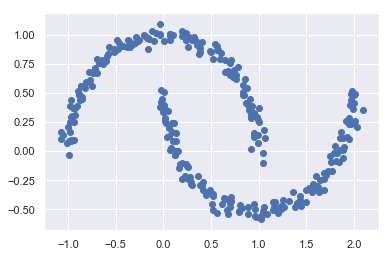

In [383]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_moons
X, y = make_moons(300, noise=.04, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

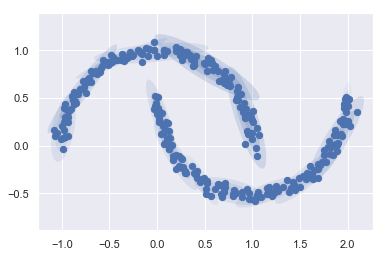

In [384]:
gmm = GaussianMixture(n_components=14, covariance_type='full', random_state=0)
plot_gmm(gmm, X, label=False)

We have generated moon dataset with scikit-learn function. As we can see in graph, there are two group points separated,like two moon. This dataset looks line non spherical shape, where k-means does not work well, since it is not possible to separate the two clusters with a line.We could embed this data set into a higher dimensional space, where the separation is possible.we can use a different type of clustering algorithm for this case. The Gaussian mixture model is based on densities and works well on data whose density in the clusters is uniform. Now We have applied Gaussian mixture model on this dataset, we want to fit the Gaussian. Here we have checked on various n_components but for perfect cluster shape we have used many more n_components and ignore the cluster labels, we find a fit that is much closer to the input data. we can look the graph, 14 mixture of Gaussian could not find seperated clusters of data, but our model overall distribution of input data. Our graph looking pretty good.

**TO DO : run k-means on the "digits" data sets and display a confusion matrix to evaluate the results. You can take inspiration https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html and comment on the quality of the results.** 

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\AZAZ\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


random   	0.48s	69479	0.605	0.652	0.628	0.475	0.601	0.148


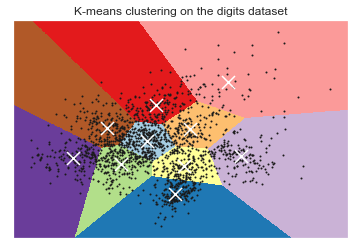

In [393]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))



bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)




# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [386]:
# Computing accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

1.0

Text(89.18, 0.5, 'predicted label')

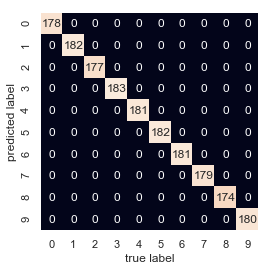

In [387]:
import seaborn as sns; sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

We have load digits dataset Using scikit-learn where we can download a set of 1797 images of handwritten digits with the correct labels 0,1,...9. The images have quite a low resolution:8 * 8= 64. K-means performed well on this dataset.That is pretty great. It actually was able to find the clusters of the 10 digits nicely and we discovered the correct grouping for 100% of the input digits.

# References


1. https://arxiv.org/pdf/1301.3558.pdf
2. https://hal.inria.fr/inria-00470775v2/document
3. https://www.cs.cmu.edu/~epxing/Class/10701-06f/project-reports/yu.pdf
4. https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters- 
553bef45f6e4       
5. https://hal.archives-ouvertes.fr/hal-01961077/document
6. https://arxiv.org/pdf/1708.00605.pdf
7. https://www.sciencedirect.com/science/article/pii/S0047259X13002625
9. https://www.stat.washington.edu/sites/default/files/files/reports/2009/tr559.pdf
10. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html